#Fazenda dos dados: Aprendendo análise de dados com Stardew Valley 🏠🎣🐔⛏

Nesse notebook vamos mergulhar em um dataset de Stardew Valley criado pela LADATA🐙.

Utilizando as ferramentas de ciência de dados iremos encontrar quais são as melhores escolhas de plantio do jogo

# Capítulo 1 - Engenharia dos dados

Nesse capítulo prepararemos e trataremos os dados para as próximas etapas

O primeiro passo para trabalhar com dados é carregar o dataset no ambiente de desenvolvimento (notebook). Para isso, vamos importar as bibliotecas Pandas Matplotlib e Seaborn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
crops = pd.read_csv('/content/drive/MyDrive/crops_updated.csv')

Vamos olhar o dataset de maneira geral para procurarmos como investigar

In [8]:
display(crops)

,Seed,Price (Regular),Price (Silver),Price (Gold),Price (Iridium),Growth Time (In Days),Purchase Source,Name,Season,Buy Price (Seed),...,XP,Regular (lvl 0),Silver (lvl 0),Gold (lvl 0),Regular (lvl 5),Silver (lvl 5),Gold (lvl 5),Regular (lvl 10),Silver (lvl 10),Gold (lvl 10)
0,Amaranth Seeds,150,187,225,300,7,"[""Pierre's"", 'JojaMart']",Amaranth,['Fall'],70,...,NaN,0.9702,0.0198,0.01,0.6942,0.1958,0.11,0.4582,0.3318,0.21
1,Ancient Seeds,550,687,825,1100,28,['Crafting Recipe'],Ancient Fruit,"['Spring', 'Summer', 'Fall']",0,...,NaN,0.9702,0.0198,0.01,0.6942,0.1958,0.11,0.4582,0.3318,0.21
2,Artichoke Seeds,160,200,240,320,8,"[""Pierre's""]",Artichoke,['Fall'],30,...,NaN,0.9702,0.0198,0.01,0.6942,0.1958,0.11,0.4582,0.3318,0.21
3,Bean Starter,40,50,60,80,10,"[""Pierre's"", 'JojaMart']",Green Bean,['Spring'],60,...,NaN,0.9702,0.0198,0.01,0.6942,0.1958,0.11,0.4582,0.3318,0.21
4,Beet Seeds,100,125,150,200,6,['Oasis'],Beet,['Fall'],20,...,NaN,0.9702,0.0198,0.01,0.6942,0.1958,0.11,0.4582,0.3318,0.21
5,Blueberry Seeds,50,62,75,100,13,"[""Pierre's""]",Blueberry,['Summer'],80,...,NaN,0.9702,0.0198,0.01,0.6942,0.1958,0.11,0.4582,0.3318,0.21
6,Bok Choy Seeds,80,100,120,160,4,"[""Pierre's"", 'JojaMart']",Bok Choy,['Fall'],50,...,NaN,0.9702,0.0198,0.01,0.6942,0.1958,0.11,0.4582,0.3318,0.21
7,Broccoli Seeds,70,87,105,140,8,['Foraging'],Broccoli,['Fall'],0,...,NaN,0.9702,0.0198,0.01,0.6942,0.1958,0.11,0.4582,0.3318,0.21
8,Cactus Seeds,75,93,112,150,12,['Oasis'],Cactus Fruit,['All'],150,...,NaN,0.9702,0.0198,0.01,0.6942,0.1958,0.11,0.4582,0.3318,0.21
9,Carrot Seeds,35,43,52,70,3,['Foraging'],Carrot,['Spring'],0,...,NaN,0.9702,0.0198,0.01,0.6942,0.1958,0.11,0.4582,0.3318,0.21


In [9]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Seed                     41 non-null     object 
 1   Price (Regular)          41 non-null     int64  
 2   Price (Silver)           41 non-null     int64  
 3   Price (Gold)             41 non-null     int64  
 4   Price (Iridium)          41 non-null     int64  
 5   Growth Time (In Days)    41 non-null     int64  
 6   Purchase Source          41 non-null     object 
 7   Name                     41 non-null     object 
 8   Season                   41 non-null     object 
 9   Buy Price (Seed)         41 non-null     int64  
 10  Regrowth Time (In Days)  15 non-null     float64
 11  XP                       0 non-null      float64
 12  Regular (lvl 0)          41 non-null     float64
 13  Silver (lvl 0)           41 non-null     float64
 14  Gold (lvl 0)             41 

Uma etapa importante na área é o tratamento dos dados, nesse caso estamos retirando todos os espaços em brancos no dataset

In [10]:
crops = crops.map(lambda x: x.strip() if isinstance(x, str) else x)

In [11]:
crops["Season"].value_counts()

,count
Season,
['Spring'],12
['Fall'],11
['Summer'],11
"['Summer', 'Fall']",3
"['Spring', 'Summer', 'Fall']",1
['All'],1
"['Spring', 'Summer']",1
['Winter'],1


Perceba que temos uma coluna (Atributo) com valores multidimensionais. Essa coluna é a de estações, como trabalhar com valores multidimensionais pode ser complexo, vamos converter essa coluna em 4 colunas representando cada estação, e os valores dessa coluna serão booleanos, isso facilitará a manipulação de informações

In [12]:
def transform_seasons(row):
  seasons_list = row['Season'].replace("[", "").replace("]", "").replace("'", "")
  seasons_list = seasons_list.split(", ")

  if seasons_list == ["All"]:
    crops.loc[row.name, ['Spring','Summer','Fall','Winter']] = 1
  else:
      for season in seasons_list:
        crops.loc[row.name, season] = 1

for season in ['Spring', 'Summer', 'Fall', 'Winter']:
  crops[season] = 0

crops.apply(transform_seasons, axis=1)
crops.drop("Season", axis=1, inplace=True)


In [13]:
display(crops)

,Seed,Price (Regular),Price (Silver),Price (Gold),Price (Iridium),Growth Time (In Days),Purchase Source,Name,Buy Price (Seed),Regrowth Time (In Days),...,Regular (lvl 5),Silver (lvl 5),Gold (lvl 5),Regular (lvl 10),Silver (lvl 10),Gold (lvl 10),Spring,Summer,Fall,Winter
0,Amaranth Seeds,150,187,225,300,7,"[""Pierre's"", 'JojaMart']",Amaranth,70,NaN,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,0,0,1,0
1,Ancient Seeds,550,687,825,1100,28,['Crafting Recipe'],Ancient Fruit,0,7.0,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,1,1,1,0
2,Artichoke Seeds,160,200,240,320,8,"[""Pierre's""]",Artichoke,30,NaN,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,0,0,1,0
3,Bean Starter,40,50,60,80,10,"[""Pierre's"", 'JojaMart']",Green Bean,60,3.0,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,1,0,0,0
4,Beet Seeds,100,125,150,200,6,['Oasis'],Beet,20,NaN,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,0,0,1,0
5,Blueberry Seeds,50,62,75,100,13,"[""Pierre's""]",Blueberry,80,4.0,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,0,1,0,0
6,Bok Choy Seeds,80,100,120,160,4,"[""Pierre's"", 'JojaMart']",Bok Choy,50,NaN,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,0,0,1,0
7,Broccoli Seeds,70,87,105,140,8,['Foraging'],Broccoli,0,4.0,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,0,0,1,0
8,Cactus Seeds,75,93,112,150,12,['Oasis'],Cactus Fruit,150,3.0,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,1,1,1,1
9,Carrot Seeds,35,43,52,70,3,['Foraging'],Carrot,0,NaN,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,1,0,0,0


In [14]:
crops.describe()

,Price (Regular),Price (Silver),Price (Gold),Price (Iridium),Growth Time (In Days),Buy Price (Seed),Regrowth Time (In Days),XP,Regular (lvl 0),Silver (lvl 0),...,Regular (lvl 5),Silver (lvl 5),Gold (lvl 5),Regular (lvl 10),Silver (lvl 10),Gold (lvl 10),Spring,Summer,Fall,Winter
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,15.000000,0.0,4.100000e+01,4.100000e+01,...,4.100000e+01,4.100000e+01,41.00,4.100000e+01,4.100000e+01,4.100000e+01,41.000000,41.000000,41.000000,41.000000
mean,126.463415,157.780488,189.585366,252.926829,8.804878,133.414634,3.666667,NaN,9.702000e-01,1.980000e-02,...,6.942000e-01,1.958000e-01,0.11,4.582000e-01,3.318000e-01,2.100000e-01,0.365854,0.414634,0.390244,0.048780
std,143.658640,179.562734,215.543148,287.317280,4.314044,386.526906,1.397276,NaN,8.992121e-16,1.053764e-17,...,4.496061e-16,1.124015e-16,0.00,1.124015e-16,1.686023e-16,2.810038e-17,0.487652,0.498779,0.493865,0.218085
min,15.000000,18.000000,22.000000,30.000000,3.000000,0.000000,1.000000,NaN,9.702000e-01,1.980000e-02,...,6.942000e-01,1.958000e-01,0.11,4.582000e-01,3.318000e-01,2.100000e-01,0.000000,0.000000,0.000000,0.000000
25%,50.000000,62.000000,75.000000,100.000000,6.000000,30.000000,3.000000,NaN,9.702000e-01,1.980000e-02,...,6.942000e-01,1.958000e-01,0.11,4.582000e-01,3.318000e-01,2.100000e-01,0.000000,0.000000,0.000000,0.000000
50%,80.000000,100.000000,120.000000,160.000000,8.000000,60.000000,4.000000,NaN,9.702000e-01,1.980000e-02,...,6.942000e-01,1.958000e-01,0.11,4.582000e-01,3.318000e-01,2.100000e-01,0.000000,0.000000,0.000000,0.000000
75%,150.000000,187.000000,225.000000,300.000000,11.000000,100.000000,4.000000,NaN,9.702000e-01,1.980000e-02,...,6.942000e-01,1.958000e-01,0.11,4.582000e-01,3.318000e-01,2.100000e-01,1.000000,1.000000,1.000000,0.000000
max,750.000000,937.000000,1125.000000,1500.000000,28.000000,2500.000000,7.000000,NaN,9.702000e-01,1.980000e-02,...,6.942000e-01,1.958000e-01,0.11,4.582000e-01,3.318000e-01,2.100000e-01,1.000000,1.000000,1.000000,1.000000


Alem disso, a coluna XP apresenta valores nulos, como essa coluna não trará nenhuma informação útil iremos remover esse atributo do nosso dataframe

In [15]:
crops.drop("XP", axis=1, inplace=True)

Observe também que algumas das informações no dataset são outliers, isto é, dados que distoam muito em relação aos outros. Para a análise não ficar distorcida, é necessário remover esses dados. Pois eles não podem ser comprados/conseguidos por um tempo no jogo

In [16]:
crops = crops.drop(crops[crops["Name"] == "Cactus Fruit"].index)
crops = crops.drop(crops[crops["Name"] == "Coffee"].index)

crops = crops.drop(crops[crops["Buy Price (Seed)"] == 0].index)
display(crops)


,Seed,Price (Regular),Price (Silver),Price (Gold),Price (Iridium),Growth Time (In Days),Purchase Source,Name,Buy Price (Seed),Regrowth Time (In Days),...,Regular (lvl 5),Silver (lvl 5),Gold (lvl 5),Regular (lvl 10),Silver (lvl 10),Gold (lvl 10),Spring,Summer,Fall,Winter
0,Amaranth Seeds,150,187,225,300,7,"[""Pierre's"", 'JojaMart']",Amaranth,70,NaN,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,0,0,1,0
2,Artichoke Seeds,160,200,240,320,8,"[""Pierre's""]",Artichoke,30,NaN,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,0,0,1,0
3,Bean Starter,40,50,60,80,10,"[""Pierre's"", 'JojaMart']",Green Bean,60,3.0,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,1,0,0,0
4,Beet Seeds,100,125,150,200,6,['Oasis'],Beet,20,NaN,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,0,0,1,0
5,Blueberry Seeds,50,62,75,100,13,"[""Pierre's""]",Blueberry,80,4.0,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,0,1,0,0
6,Bok Choy Seeds,80,100,120,160,4,"[""Pierre's"", 'JojaMart']",Bok Choy,50,NaN,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,0,0,1,0
10,Cauliflower Seeds,175,218,262,350,12,"[""Pierre's"", 'JojaMart']",Cauliflower,80,NaN,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,1,0,0,0
12,Corn Seeds,50,62,75,100,14,"[""Pierre's"", 'JojaMart']",Corn,150,4.0,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,0,1,1,0
13,Cranberry Seeds,75,93,112,150,7,"[""Pierre's"", 'JojaMart']",Cranberries,240,5.0,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,0,0,1,0
14,Eggplant Seeds,60,75,90,120,5,"[""Pierre's"", 'JojaMart']",Eggplant,20,5.0,...,0.6942,0.1958,0.11,0.4582,0.3318,0.21,0,0,1,0


In [17]:
crops_AI = crops.copy()

# Capítulo 2 - Análise dos dados

Nesse capítulos iremos analisar os gráficos e realizar operações com o Dataset para obtermos o máximo de informações possíveis

O primeiro escolhido é o gráfico de dispersão (scatter plot), é possível relacionar a coluna de preço com o tempo de crescimento de uma lavoura. Dessa forma podemos ver como a relação entre esses atributos está dispersa, além disso, podemos plotar a aproximação linear dessa função, acima dessa linha estarão as lavouras com o maior custo benefício (tempo de crescimento / preço de venda)

<Axes: xlabel='Growth Time (In Days)', ylabel='Price (Regular)'>

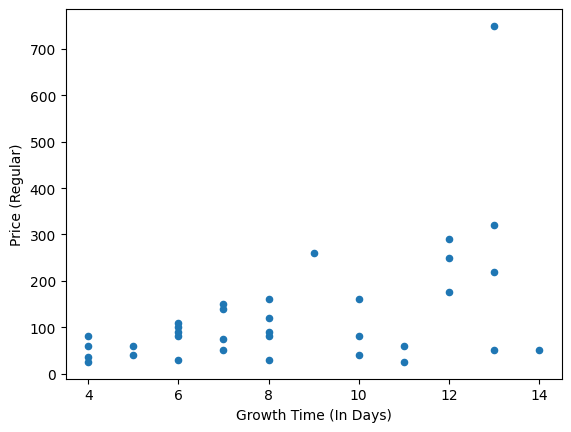

In [18]:
crops.plot(kind="scatter", x="Growth Time (In Days)", y="Price (Regular)")

<Axes: xlabel='Buy Price (Seed)', ylabel='Price (Regular)'>

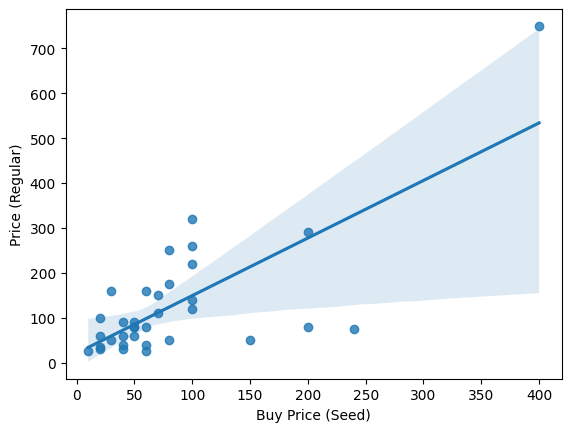

In [19]:
sns.regplot(x=crops["Buy Price (Seed)"], y=crops["Price (Regular)"])

Veja que podemos adicionar um novo atributo no dataframe para facilitar a análise, aqui estamos criando uma nova métrica "Markup Per Day", ela representa o Lucro médio diário de um plantio

In [20]:
crops['Markup Per Day'] = (crops['Price (Regular)'] - crops['Buy Price (Seed)']).div(crops['Growth Time (In Days)'])

In [21]:
display(crops)

,Seed,Price (Regular),Price (Silver),Price (Gold),Price (Iridium),Growth Time (In Days),Purchase Source,Name,Buy Price (Seed),Regrowth Time (In Days),...,Silver (lvl 5),Gold (lvl 5),Regular (lvl 10),Silver (lvl 10),Gold (lvl 10),Spring,Summer,Fall,Winter,Markup Per Day
0,Amaranth Seeds,150,187,225,300,7,"[""Pierre's"", 'JojaMart']",Amaranth,70,NaN,...,0.1958,0.11,0.4582,0.3318,0.21,0,0,1,0,11.428571
2,Artichoke Seeds,160,200,240,320,8,"[""Pierre's""]",Artichoke,30,NaN,...,0.1958,0.11,0.4582,0.3318,0.21,0,0,1,0,16.250000
3,Bean Starter,40,50,60,80,10,"[""Pierre's"", 'JojaMart']",Green Bean,60,3.0,...,0.1958,0.11,0.4582,0.3318,0.21,1,0,0,0,-2.000000
4,Beet Seeds,100,125,150,200,6,['Oasis'],Beet,20,NaN,...,0.1958,0.11,0.4582,0.3318,0.21,0,0,1,0,13.333333
5,Blueberry Seeds,50,62,75,100,13,"[""Pierre's""]",Blueberry,80,4.0,...,0.1958,0.11,0.4582,0.3318,0.21,0,1,0,0,-2.307692
6,Bok Choy Seeds,80,100,120,160,4,"[""Pierre's"", 'JojaMart']",Bok Choy,50,NaN,...,0.1958,0.11,0.4582,0.3318,0.21,0,0,1,0,7.500000
10,Cauliflower Seeds,175,218,262,350,12,"[""Pierre's"", 'JojaMart']",Cauliflower,80,NaN,...,0.1958,0.11,0.4582,0.3318,0.21,1,0,0,0,7.916667
12,Corn Seeds,50,62,75,100,14,"[""Pierre's"", 'JojaMart']",Corn,150,4.0,...,0.1958,0.11,0.4582,0.3318,0.21,0,1,1,0,-7.142857
13,Cranberry Seeds,75,93,112,150,7,"[""Pierre's"", 'JojaMart']",Cranberries,240,5.0,...,0.1958,0.11,0.4582,0.3318,0.21,0,0,1,0,-23.571429
14,Eggplant Seeds,60,75,90,120,5,"[""Pierre's"", 'JojaMart']",Eggplant,20,5.0,...,0.1958,0.11,0.4582,0.3318,0.21,0,0,1,0,8.000000


Com essa nova métrica criada podemos agora utilizar um gráfico de barras para observar quais serão as melhores lavouras a partir dessa métrica

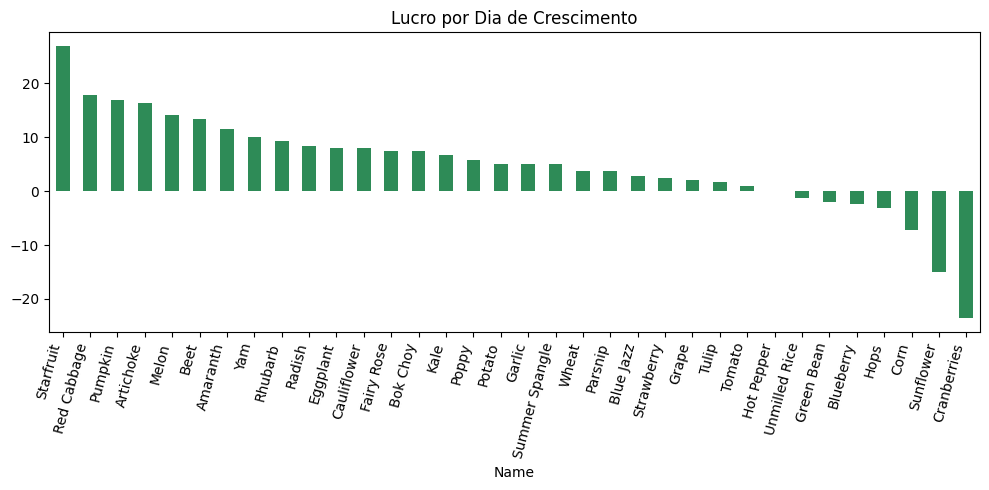

In [22]:
crops_sorted = crops.sort_values('Markup Per Day', ascending=False)

crops_sorted.plot(
    x='Name',
    y='Markup Per Day',
    kind='bar',
    figsize=(10,5),
    legend=False,
    color='seagreen'
)

plt.title('Lucro por Dia de Crescimento')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

O gráfico já facilita muito a visualização, porém ele possui muitos valores, podemos separar as sementes por estação para obtermos gráficos mais simples de analisar e, também, mais condizentes com o jogo. Perceba que não foram filtradas sementes de inverno, pois, após o tratamento dos outliers no capítulo de engenharias não sobraram sementes de inverno plantáveis

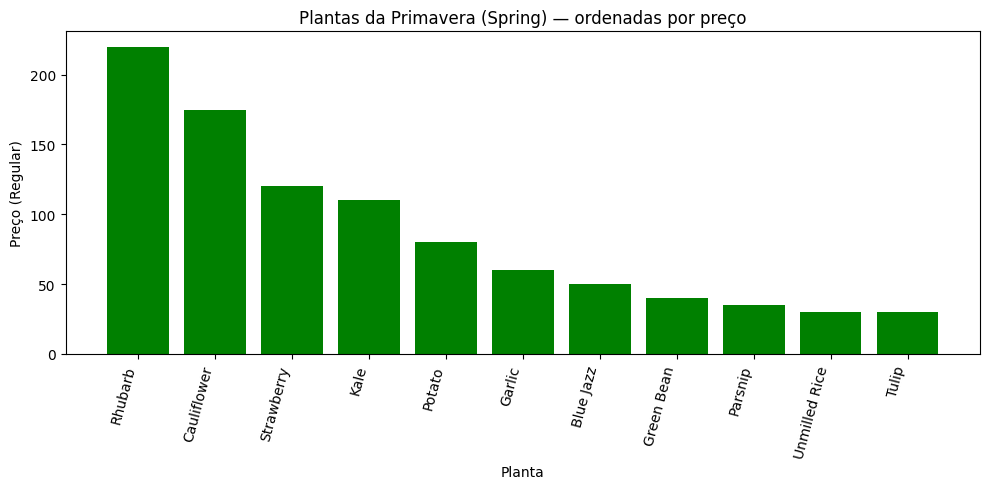

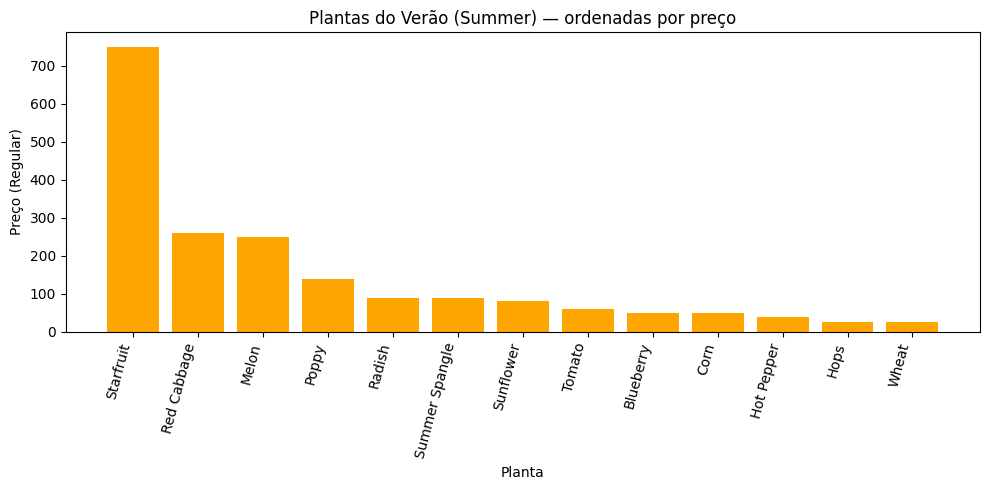

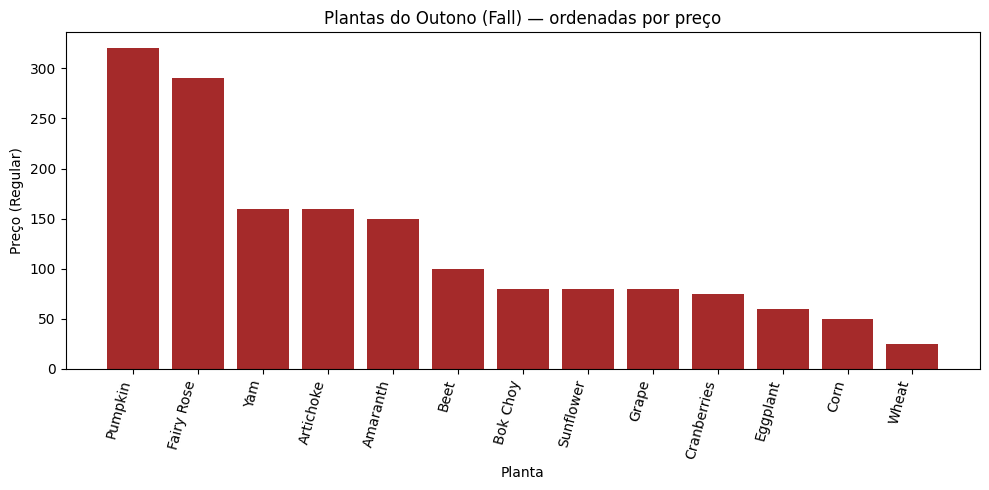

In [23]:
crops_summer = crops[crops["Summer"] == 1].sort_values("Price (Regular)", ascending=False)
crops_spring = crops[crops["Spring"] == 1].sort_values("Price (Regular)", ascending=False)
crops_fall   = crops[crops["Fall"] == 1].sort_values("Price (Regular)", ascending=False)

# Spring
plt.figure(figsize=(10,5))
plt.bar(crops_spring["Name"], crops_spring["Price (Regular)"], color="green")
plt.title("Plantas da Primavera (Spring) — ordenadas por preço")
plt.xlabel("Planta")
plt.ylabel("Preço (Regular)")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

# Summer
plt.figure(figsize=(10,5))
plt.bar(crops_summer["Name"], crops_summer["Price (Regular)"], color="orange")
plt.title("Plantas do Verão (Summer) — ordenadas por preço")
plt.xlabel("Planta")
plt.ylabel("Preço (Regular)")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

# Fall
plt.figure(figsize=(10,5))
plt.bar(crops_fall["Name"], crops_fall["Price (Regular)"], color="brown")
plt.title("Plantas do Outono (Fall) — ordenadas por preço")
plt.xlabel("Planta")
plt.ylabel("Preço (Regular)")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()


Observe que mesmo que seja um caminho possível de análise, algumas métricas estão sendo desconsideradas dessa maneira, como as plantas que crescem novamente após colheita (regrowth time) e também as lavouras que podem ser plantadas em mais de uma estação. Para resolver isso, iremos criar uma função que calculará o lucro por ano das lavouras (Markup per year)

In [24]:
crops_test = crops.copy()

def cost_per_year(row):
  count_seasons = int(row["Spring"]) + int(row["Summer"]) + int(row["Fall"]) + int(row["Winter"])

  if pd.isna(row['Regrowth Time (In Days)']):
      regrowth_counts = int((28*count_seasons) / int(row['Growth Time (In Days)']))
      crops_test.loc[row.name,"Cost per Year"] = regrowth_counts * row['Buy Price (Seed)']
      crops_test.loc[row.name,"Price per Year (Regular)"] = regrowth_counts * row['Price (Regular)']

  else:
      harvest_counts = int(((28 * count_seasons) - row["Growth Time (In Days)"]) / row["Regrowth Time (In Days)"]) + 1
      crops_test.loc[row.name,"Cost per Year"] = row['Buy Price (Seed)']
      crops_test.loc[row.name,"Price per Year (Regular)"] = harvest_counts * row['Price (Regular)']

  crops_test.loc[row.name,"Markup per Year"] = crops_test.loc[row.name,"Price per Year (Regular)"] - crops_test.loc[row.name,"Cost per Year"]

crops_test["Price per Year (Regular)"] = 0
crops_test["Cost per Year"] = 0
crops_test["Markup per Year"] = 0
crops_test.apply(cost_per_year, axis=1)
display(crops_test)

,Seed,Price (Regular),Price (Silver),Price (Gold),Price (Iridium),Growth Time (In Days),Purchase Source,Name,Buy Price (Seed),Regrowth Time (In Days),...,Silver (lvl 10),Gold (lvl 10),Spring,Summer,Fall,Winter,Markup Per Day,Price per Year (Regular),Cost per Year,Markup per Year
0,Amaranth Seeds,150,187,225,300,7,"[""Pierre's"", 'JojaMart']",Amaranth,70,NaN,...,0.3318,0.21,0,0,1,0,11.428571,600,280,320
2,Artichoke Seeds,160,200,240,320,8,"[""Pierre's""]",Artichoke,30,NaN,...,0.3318,0.21,0,0,1,0,16.250000,480,90,390
3,Bean Starter,40,50,60,80,10,"[""Pierre's"", 'JojaMart']",Green Bean,60,3.0,...,0.3318,0.21,1,0,0,0,-2.000000,280,60,220
4,Beet Seeds,100,125,150,200,6,['Oasis'],Beet,20,NaN,...,0.3318,0.21,0,0,1,0,13.333333,400,80,320
5,Blueberry Seeds,50,62,75,100,13,"[""Pierre's""]",Blueberry,80,4.0,...,0.3318,0.21,0,1,0,0,-2.307692,200,80,120
6,Bok Choy Seeds,80,100,120,160,4,"[""Pierre's"", 'JojaMart']",Bok Choy,50,NaN,...,0.3318,0.21,0,0,1,0,7.500000,560,350,210
10,Cauliflower Seeds,175,218,262,350,12,"[""Pierre's"", 'JojaMart']",Cauliflower,80,NaN,...,0.3318,0.21,1,0,0,0,7.916667,350,160,190
12,Corn Seeds,50,62,75,100,14,"[""Pierre's"", 'JojaMart']",Corn,150,4.0,...,0.3318,0.21,0,1,1,0,-7.142857,550,150,400
13,Cranberry Seeds,75,93,112,150,7,"[""Pierre's"", 'JojaMart']",Cranberries,240,5.0,...,0.3318,0.21,0,0,1,0,-23.571429,375,240,135
14,Eggplant Seeds,60,75,90,120,5,"[""Pierre's"", 'JojaMart']",Eggplant,20,5.0,...,0.3318,0.21,0,0,1,0,8.000000,300,20,280


Com essa nova métrica, vamos, novamente, filtrar os dados por estação e plotar seus gráficos de barras

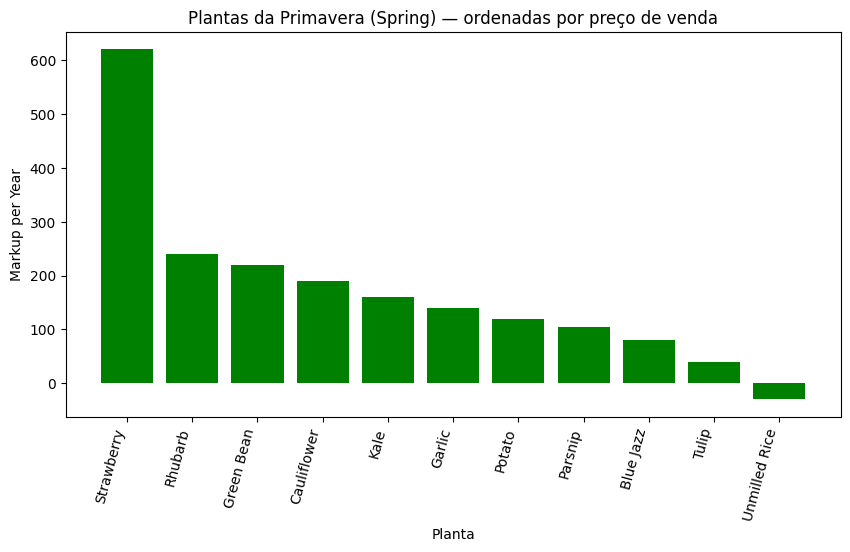

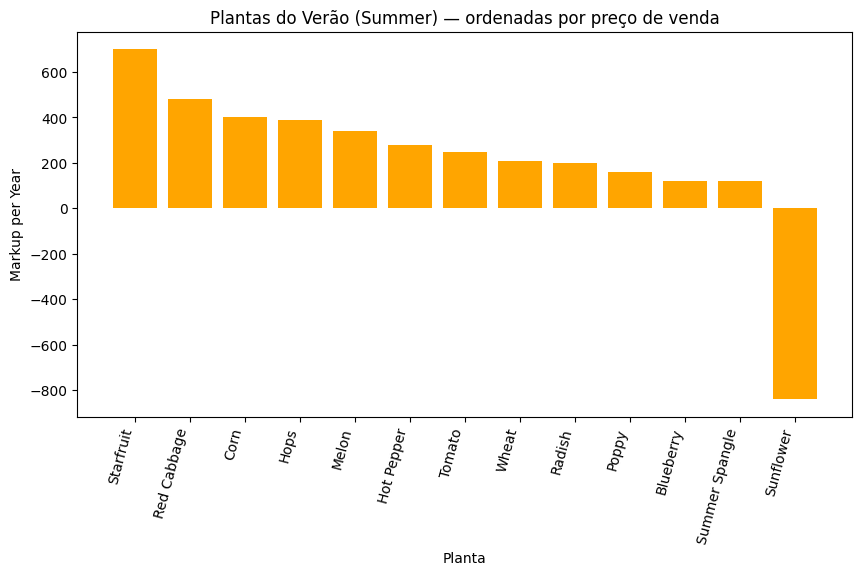

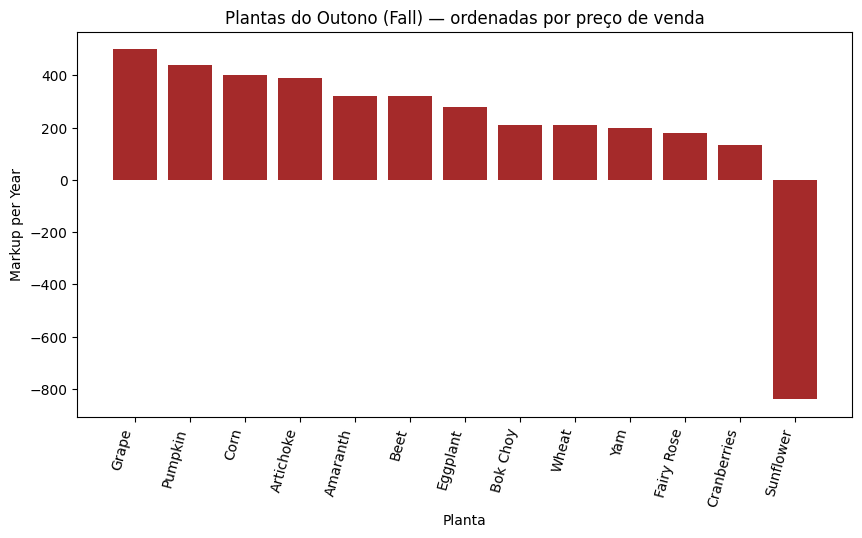

In [25]:
crops_test_summer = crops_test[crops_test["Summer"] == 1].sort_values("Markup per Year", ascending=False)
crops_test_spring = crops_test[crops_test["Spring"] == 1].sort_values("Markup per Year", ascending=False)
crops_test_fall   = crops_test[crops_test["Fall"] == 1].sort_values("Markup per Year", ascending=False)

# Spring
plt.figure(figsize=(10,5))
plt.bar(crops_test_spring["Name"], crops_test_spring["Markup per Year"], color="green")
plt.title("Plantas da Primavera (Spring) — ordenadas por preço de venda")
plt.xlabel("Planta")
plt.ylabel("Markup per Year")
plt.xticks(rotation=75, ha='right')
plt.show()

# Summer
plt.figure(figsize=(10,5))
plt.bar(crops_test_summer["Name"], crops_test_summer["Markup per Year"], color="orange")
plt.title("Plantas do Verão (Summer) — ordenadas por preço de venda")
plt.xlabel("Planta")
plt.ylabel("Markup per Year")
plt.xticks(rotation=75, ha='right')
plt.show()

# Fall
plt.figure(figsize=(10,5))
plt.bar(crops_test_fall["Name"], crops_test_fall["Markup per Year"], color="brown")
plt.title("Plantas do Outono (Fall) — ordenadas por preço de venda")
plt.xlabel("Planta")
plt.ylabel("Markup per Year")
plt.xticks(rotation=75, ha='right')
plt.show()


Observe que isso mudou drasticamente nossa descoberta, por exemplo, o melhor plantio para a primavera não é o ruibarbo, e sim o morango. Isso mostrou que o lucro por ano é de fato uma métrica mais precisa e criteriosa

Como última etapa da análise iremos utilizar um gráifco de dispersão interativo para facilitar a visualização. Há uma especificidade no uso desses gráficos que é a escala logarítmica no eixo X, isso melhora a dispersão dos dados e facilita a visualização

In [26]:
import plotly.express as px

fig_spring = px.scatter(crops_test_spring, x="Cost per Year", y="Price per Year (Regular)", hover_name="Name", text="Name", log_x=True)
fig_spring.show()

In [27]:
fig_summer = px.scatter(crops_test_summer, x="Cost per Year", y="Price per Year (Regular)", hover_name="Name", text="Name", log_x=True)
fig_summer.show()

In [28]:
fig_fall = px.scatter(crops_test_fall, x="Cost per Year", y="Price per Year (Regular)", hover_name="Name", text="Name", log_x=True)
fig_fall.show()

# Capítulo 3 - Aprendizado de máquina

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, export_text

In [ ]:
crops = crops_AI.copy()

SEASON_LENGTH = 28

def get_yield(name: str) -> int:
    name = str(name).lower()
    if 'blueberry' in name:   return 3
    if 'cranberries' in name: return 2
    if 'coffee' in name:      return 4
    return 1

def harvests_per_period(total_days: int, growth_time: float, regrow_time: float) -> int:
    regrow_time = 0 if pd.isna(regrow_time) else regrow_time
    if regrow_time == 0:
        return int(np.floor(total_days / growth_time))
    else:
        return 1 + int(np.floor((total_days - growth_time) / regrow_time))

def profit_over_days(row, total_days: int) -> float:
    g  = row['Growth Time (In Days)']
    r  = 0 if pd.isna(row['Regrowth Time (In Days)']) else row['Regrowth Time (In Days)']
    p  = row['Price (Regular)']
    c  = row['Buy Price (Seed)']
    y  = row.get('yield_per_harvest', np.nan)
    if pd.isna(y): y = get_yield(row['Name'])

    n = harvests_per_period(total_days, g, r)
    revenue = n * p * y
    cost    = c if r > 0 else n * c
    return revenue - cost

def best_cross_season_label(row, season_name: str) -> float:
    season_order = ['Spring', 'Summer', 'Fall']
    s_idx = season_order.index(season_name)

    # lucro de 28 dias
    lbl_28 = profit_over_days(row, SEASON_LENGTH)

    # checa se atravessa para estacao seguinte
    next_idx = s_idx + 1
    if next_idx < len(season_order):
        next_season = season_order[next_idx]
        grows_now   = (row[season_name] == 1)
        grows_next  = (row[next_season] == 1)
        regrow      = 0 if pd.isna(row['Regrowth Time (In Days)']) else row['Regrowth Time (In Days)']
        if grows_now and grows_next and regrow > 0:
            lbl_56 = profit_over_days(row, 2 * SEASON_LENGTH)
            return max(lbl_28, lbl_56)
    return lbl_28

# garante colunas essenciais
if 'yield_per_harvest' not in crops.columns:
    crops['yield_per_harvest'] = crops['Name'].apply(get_yield)

for s in ['Spring','Summer','Fall']:
    if f'profit_{s}' not in crops.columns:
        crops[f'profit_{s}'] = crops.apply(
            lambda r: profit_over_days(r, SEASON_LENGTH) if r[s] == 1 else 0, axis=1
        )


In [ ]:
FEATURES = [
    'Price (Regular)', 'Buy Price (Seed)',
    'Growth Time (In Days)', 'Regrowth Time (In Days)',
    'yield_per_harvest'
]

def fit_tree_for_season(crops_season: pd.DataFrame, season_name: str, max_depth=3):
    # melhor lucro 28 ou 56 dias para essa estacao
    y = crops_season.apply(lambda r: best_cross_season_label(r, season_name), axis=1)
    X = crops_season[FEATURES].fillna(0)

    tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree.fit(X, y)
    return tree, X, y

def recommend_for_season(season_name: str, k_top=5, max_depth=3):
    cand = crops[crops[season_name] == 1].copy()
    if cand.empty:
        return season_name, None, None, None

    tree, X, y = fit_tree_for_season(cand, season_name, max_depth=max_depth)
    cand['y_pred'] = tree.predict(X)

    # top-k previsoes
    top = cand[['Name', 'y_pred', 'Price (Regular)', 'Buy Price (Seed)',
                'Growth Time (In Days)', 'Regrowth Time (In Days)', 'yield_per_harvest']
              ].sort_values('y_pred', ascending=False).head(k_top)

    rules = export_text(tree, feature_names=FEATURES, max_depth=max_depth)
    return season_name, top, rules, tree

results = {}
for s in ['Spring','Summer','Fall']:
    season, top, rules, tree = recommend_for_season(s, k_top=5, max_depth=3)
    results[s] = (top, rules, tree)

# resultado final
for s in ['Spring','Summer','Fall']:
    top, rules, tree = results[s]
    print(f"\n {s} - 5 melhores ")
    if top is None:
        print("Sem candidatos.")
        continue
    print(top.to_string(index=False, float_format=lambda x: f'{x:.0f}'))
    print("\n Regras da árvore de decisão:")
    print(rules)



 Spring - 5 melhores 
       Name  y_pred  Price (Regular)  Buy Price (Seed)  Growth Time (In Days)  Regrowth Time (In Days)  yield_per_harvest
 Strawberry     620              120               100                      8                        4                  1
Cauliflower     217              175                80                     12                      NaN                  1
 Green Bean     217               40                60                     10                        3                  1
    Rhubarb     217              220               100                     13                      NaN                  1
       Kale     160              110                70                      6                      NaN                  1

 Regras da árvore de decisão:
|--- Regrowth Time (In Days) <= 3.50
|   |--- Buy Price (Seed) <= 55.00
|   |   |--- Price (Regular) <= 32.50
|   |   |   |--- value: [5.00]
|   |   |--- Price (Regular) >  32.50
|   |   |   |--- value: [111.25]
| 

In [ ]:
# seleciona a melhor cultura de cada estacao
plan = []
for s in ['Spring','Summer','Fall']:
    top, _, _ = results[s]
    if top is not None and len(top) > 0:
        best = top.iloc[0]
        plan.append({
            'Season': s,
            'Crop'  : best['Name'],
            'Pred_Profit': float(best['y_pred'])
        })

plan_crops = pd.DataFrame(plan)
print("\n Plano anual recomendado pela árvores de decisão")
print(plan_crops.to_string(index=False, float_format=lambda x: f'{x:.0f}'))



 Plano anual recomendado pela árvores de decisão
Season        Crop  Pred_Profit
Spring  Strawberry          620
Summer   Starfruit          700
  Fall Cranberries          510


In [ ]:
for s in ['Spring','Summer','Fall']:
    top, _, tree = results[s]
    if tree is None:
        continue
    print(f"\nImportâncias de atributos — {s}")
    for f, imp in sorted(zip(FEATURES, tree.feature_importances_), key=lambda x: -x[1]):
        print(f"{f}: {imp:.3f}")



Importâncias de atributos — Spring
Regrowth Time (In Days): 0.798
Buy Price (Seed): 0.139
Price (Regular): 0.054
Growth Time (In Days): 0.009
yield_per_harvest: 0.000

Importâncias de atributos — Summer
Growth Time (In Days): 0.535
Buy Price (Seed): 0.446
Regrowth Time (In Days): 0.019
Price (Regular): 0.000
yield_per_harvest: 0.000

Importâncias de atributos — Fall
Growth Time (In Days): 0.775
Buy Price (Seed): 0.225
Price (Regular): 0.000
Regrowth Time (In Days): 0.000
yield_per_harvest: 0.000
